<a href="https://colab.research.google.com/github/surajgazi100/Predicting-Car-Prices/blob/main/Predicting%20Car%20Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd

from google.colab import files
uploaded = files.upload()


Saving imports-85.data to imports-85.data


In [7]:

columns = ['symboling', 'normalized_losses', 'make:', 'fuel-type', 'aspirations',
               'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
               'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
               'num_of_cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
               'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg',
               'price']

In [8]:
cars = pd.read_csv('imports-85.data', names = columns)

In [9]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    object 
 2   make:              205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspirations        205 non-null    object 
 5   num_of_doors       205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine-size        205 non

In [10]:

cars.head()

,symboling,normalized_losses,make:,fuel-type,aspirations,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [11]:

import numpy as np

numeric_columns = [ 'normalized_losses', 'wheel_base', 'length', 'width', 
                   'height','curb_weight', 'bore', 'stroke', 'compression-ratio', 
                   'horsepower','peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[numeric_columns]
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized_losses  205 non-null    object 
 1   wheel_base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb_weight        205 non-null    int64  
 6   bore               205 non-null    object 
 7   stroke             205 non-null    object 
 8   compression-ratio  205 non-null    float64
 9   horsepower         205 non-null    object 
 10  peak-rpm           205 non-null    object 
 11  city-mpg           205 non-null    int64  
 12  highway-mpg        205 non-null    int64  
 13  price              205 non-null    object 
dtypes: float64(5), int64(3), object(6)
memory usage: 22.5+ KB


In [12]:
object_columns = ['normalized_losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
numeric_cars[object_columns].head(10)

,normalized_losses,bore,stroke,horsepower,peak-rpm,price
0,?,3.47,2.68,111,5000,13495
1,?,3.47,2.68,111,5000,16500
2,?,2.68,3.47,154,5000,16500
3,164,3.19,3.40,102,5500,13950
4,164,3.19,3.40,115,5500,17450
5,?,3.19,3.40,110,5500,15250
6,158,3.19,3.40,110,5500,17710
7,?,3.19,3.40,110,5500,18920
8,158,3.13,3.40,140,5500,23875
9,?,3.13,3.40,160,5500,?


In [13]:
import numpy as np

numeric_cars = numeric_cars.replace('?', np.nan)
numeric_cars[object_columns] = numeric_cars[object_columns].astype('float')
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized_losses  164 non-null    float64
 1   wheel_base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb_weight        205 non-null    int64  
 6   bore               201 non-null    float64
 7   stroke             201 non-null    float64
 8   compression-ratio  205 non-null    float64
 9   horsepower         203 non-null    float64
 10  peak-rpm           203 non-null    float64
 11  city-mpg           205 non-null    int64  
 12  highway-mpg        205 non-null    int64  
 13  price              201 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 22.5 KB


In [14]:

numeric_cars.isnull().sum()

normalized_losses    41
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [15]:
numeric_cars = numeric_cars.dropna(subset=['price'] )
numeric_cars = numeric_cars.fillna(numeric_cars.mean())
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized_losses  201 non-null    float64
 1   wheel_base         201 non-null    float64
 2   length             201 non-null    float64
 3   width              201 non-null    float64
 4   height             201 non-null    float64
 5   curb_weight        201 non-null    int64  
 6   bore               201 non-null    float64
 7   stroke             201 non-null    float64
 8   compression-ratio  201 non-null    float64
 9   horsepower         201 non-null    float64
 10  peak-rpm           201 non-null    float64
 11  city-mpg           201 non-null    int64  
 12  highway-mpg        201 non-null    int64  
 13  price              201 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 23.6 KB


In [17]:
price_col = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col

In [18]:
from math import sqrt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(training_column, target_column, dataframe, k):
    # Shuffling the index and creating two sets:
    shuffled_index = np.random.permutation(dataframe.index)
    dataframe = dataframe.reindex(shuffled_index)
    train_df = dataframe.iloc[0:150]
    test_df = dataframe.iloc[150:]   

    # Apllying the model
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(train_df[[training_column]], train_df[target_column])
    predictions = knn.predict(test_df[[training_column]])
    
    # Returning the RMSE
    mse = mean_squared_error(test_df[target_column], predictions) 
    return sqrt(mse)

In [19]:
features = list(numeric_cars)
features.remove('price')
k_values = [1, 3, 5, 7, 9]
mse_dict = {}

for column in features:
    mse_list = []
    mse_dict[column] = mse_list
    for k in k_values:
        mse = round(knn_train_test(column, 'price', numeric_cars, k), 1)
        mse_list.append(mse)

In [20]:
univariate_mse = pd.DataFrame(data = mse_dict)
univariate_mse['k'] = [1, 3, 5, 7, 9]
univariate_mse = univariate_mse.set_index('k')
univariate_mse

,normalized_losses,wheel_base,length,width,height,curb_weight,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
k,,,,,,,,,,,,,
1,6675.7,3220.9,3191.7,5555.3,9188.2,5449.4,5336.1,4967.6,6601.7,3612.9,9006.5,5138.6,4314.8
3,6467.2,6185.4,7091.9,4642.3,8575.8,3794.3,7704.8,6732.2,5145.7,3574.5,7956.6,3897.4,4529.0
5,6555.3,5257.2,4608.7,3356.0,6109.8,3047.3,7718.9,7382.4,7217.3,4851.2,8200.7,3391.7,3162.9
7,7703.4,5629.7,6049.6,3636.6,8208.2,5352.0,6228.0,7734.1,7261.3,4088.4,7067.0,4126.7,4941.3
9,7610.6,7415.9,4781.3,5420.0,6491.1,1989.5,7334.3,5807.8,5617.4,3844.9,7400.6,5325.0,4278.2


In [21]:
univariate_mse.mean().sort_values()

curb_weight          3926.50
horsepower           3994.38
highway-mpg          4245.24
city-mpg             4375.88
width                4522.04
length               5144.64
wheel_base           5541.82
compression-ratio    6368.68
stroke               6524.82
bore                 6864.42
normalized_losses    7002.44
height               7714.62
peak-rpm             7926.28
dtype: float64

([<matplotlib.axis.XTick at 0x7f5bb4445f28>,
 <a list of 5 Text major ticklabel objects>)

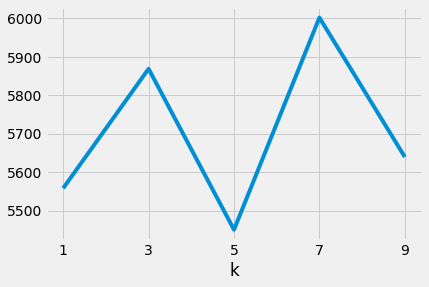

In [23]:
univariate_mse.min().sort_values()
import matplotlib.pyplot as plt
% matplotlib inline

plt.style.use('fivethirtyeight')

univariate_mse.mean(axis=1).plot()
plt.xticks([1,3,5,7,9])


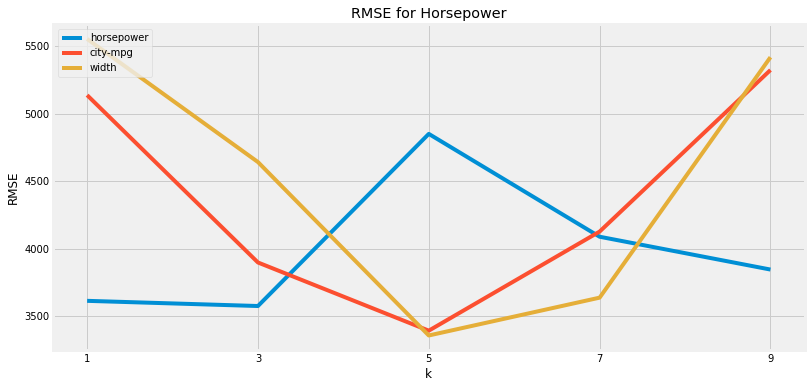

In [24]:
import matplotlib.pyplot as plt
% matplotlib inline


fig, ax = plt.subplots(figsize=(12,6))

univariate_mse['horsepower'].plot()
univariate_mse['city-mpg'].plot()
univariate_mse['width'].plot()
plt.xticks([1,3,5,7,9])
plt.title('RMSE for Horsepower')
plt.ylabel('RMSE')
plt.xlabel('k')
plt.legend(loc='upper left')

In [25]:
def knn_train_test_multi(training_columns, target_column, dataframe, k):
    # Shuffling the index and creating two sets:
    shuffled_index = np.random.permutation(dataframe.index)
    dataframe = dataframe.reindex(shuffled_index)
    train_df = dataframe.iloc[0:150]
    test_df = dataframe.iloc[150:]   

    # Apllying the model
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(train_df[training_columns], train_df[target_column])
    predictions = knn.predict(test_df[training_columns])
    
    # Returning the RMSE
    mse = mean_squared_error(test_df[target_column], predictions) 
    return sqrt(mse)

In [27]:
rmse = knn_train_test_multi(['horsepower', 'width'], 'price', numeric_cars, 2)

In [28]:
two_features = ['horsepower', 'width']
three_features = ['horsepower', 'width', 'city-mpg']
four_features = ['horsepower', 'width', 'city-mpg', 'curb_weight']
five_features = ['horsepower', 'width', 'city-mpg', 'curb_weight', 'highway-mpg']
all_features = list(numeric_cars.columns)
all_features.remove('price')
feature_combination = [two_features, three_features, four_features, five_features, all_features]
feature_names= ['two_features', 'three_features', 'four_features', 'five_features', 'all_features']
k_values = [i for i in range(1, 26)]
mse_dict_multi = {}

for index, features in enumerate(feature_combination):
    mse_list = []
    mse_dict_multi[feature_names[index]] = mse_list
    for k in k_values:
        mse = round(knn_train_test_multi(features, 'price', numeric_cars, k), 1)
        mse_list.append(mse)

In [30]:
multivariate_mse = pd.DataFrame(data = mse_dict_multi)
multivariate_mse['k'] = k_values
multivariate_mse =multivariate_mse.set_index('k')
multivariate_mse

,two_features,three_features,four_features,five_features,all_features
k,,,,,
1,4626.1,2930.5,3000.0,2309.8,2252.9
2,2896.2,3031.1,4172.7,2671.2,2107.0
3,3134.8,3400.1,2448.3,2655.8,2727.0
4,3722.8,2208.7,2625.9,1899.0,3704.9
5,3848.9,2830.9,4733.1,3999.7,5792.4
6,4256.4,2457.1,3970.1,2596.4,3519.6
7,3464.7,3419.4,3101.9,3375.2,3326.3
8,4085.1,4439.3,2825.7,3812.1,3671.5
9,5493.0,3350.7,2356.0,3011.0,5288.8


In [31]:

multivariate_mse.min().sort_values()

five_features     1899.0
all_features      2107.0
three_features    2208.7
four_features     2317.6
two_features      2896.2
dtype: float64

Text(0.5, 0, 'k')

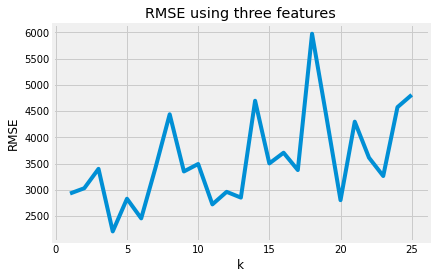

In [32]:
multivariate_mse['three_features'].plot()
plt.title('RMSE using three features')
plt.ylabel('RMSE')
plt.xlabel('k')